In [33]:
import numpy as np
import pandas as pd
import math, time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import mlrose_hiive as mlrose
from sklearn.metrics import accuracy_score


In [72]:
args = {
    'gradient_descent': {
         'hidden_nodes': [64], 
         'activation': 'relu',
         'algorithm': 'gradient_descent', 
         'max_iters': 1200,
         'bias': True, 
         'is_classifier': True, 
         'learning_rate': 0.0001,
         'early_stopping': True, 
         'clip_max': 5, 
         'max_attempts': 500,
         'random_state': 3, 
         'curve': True
    },
    'random_hill_climb': {
         'hidden_nodes': [64], 
         'activation': 'relu',
         'algorithm': 'random_hill_climb', 
         'max_iters': 1200,
         'bias': True, 
         'is_classifier': True, 
         'learning_rate': 0.0001,
         'early_stopping': True, 
         'clip_max': 5, 
         'max_attempts': 500,
         'random_state': 3, 
         'restarts': 0,
         'curve': True
    },
    'simulated_annealing': {
         'hidden_nodes': [64], 
         'activation': 'relu',
         'algorithm': 'simulated_annealing', 
         'max_iters': 1200,
         'bias': True, 
         'is_classifier': True, 
         'learning_rate': 0.0001,
         'early_stopping': True, 
         'clip_max': 5, 
         'max_attempts': 500,
         'random_state': 3, 
         'schedule': mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001),
         'curve': True
    },
    'genetic_alg': {
         'hidden_nodes': [64], 
         'activation': 'relu',
         'algorithm': 'genetic_alg', 
         'max_iters': 1200,
         'bias': True, 
         'is_classifier': True, 
         'learning_rate': 0.0001,
         'early_stopping': True, 
         'clip_max': 5, 
         'max_attempts': 500,
         'random_state': 3, 
         'pop_size': 200,
         'mutation_prob': 0.1,
         'curve': True
    },
}
test_args = {
    'gradient_descent': {
         'hidden_nodes': [64], 
         'activation': 'relu',
         'algorithm': 'gradient_descent', 
         'max_iters': 10,
         'bias': True, 
         'is_classifier': True, 
         'learning_rate': 0.0001,
         'early_stopping': True, 
         'clip_max': 5, 
         'max_attempts': 500,
         'random_state': 3, 
         'curve': True
    },
    'random_hill_climb': {
         'hidden_nodes': [64], 
         'activation': 'relu',
         'algorithm': 'random_hill_climb', 
         'max_iters': 10,
         'bias': True, 
         'is_classifier': True, 
         'learning_rate': 0.0001,
         'early_stopping': True, 
         'clip_max': 5, 
         'max_attempts': 500,
         'random_state': 3, 
         'restarts': 0,
         'curve': True
    },
    'simulated_annealing': {
         'hidden_nodes': [64], 
         'activation': 'relu',
         'algorithm': 'simulated_annealing', 
         'max_iters': 10,
         'bias': True, 
         'is_classifier': True, 
         'learning_rate': 0.0001,
         'early_stopping': True, 
         'clip_max': 5, 
         'max_attempts': 500,
         'random_state': 3, 
         'schedule': mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001),
         'curve': True
    },
    'genetic_alg': {
         'hidden_nodes': [64], 
         'activation': 'relu',
         'algorithm': 'genetic_alg', 
         'max_iters': 10,
         'bias': True, 
         'is_classifier': True, 
         'learning_rate': 0.0001,
         'early_stopping': True, 
         'clip_max': 5, 
         'max_attempts': 500,
         'random_state': 3, 
         'pop_size': 200,
         'mutation_prob': 0.1,
         'curve': True
    },
}

In [73]:
def plot_single(x_vals, y_vals, x_label, y_label, title):
    if not x_vals:
        plt.plot(y_vals)
    else:
        plt.plot(x_vals, y_vals)
    plt.xlabel (x_label)
    plt.ylabel (y_label)
    plt.legend()
    plt.title (title)
    plt.show()

def test_arg(arg_name, arg_range, alg_name, args):
    arg_accs = []
    for arg_val in arg_range:
        args[alg_name][arg_name] = arg_val
        start_time = time.time()
        model = mlrose.NeuralNetwork(**args[alg_name])
        time_elapsed = time.time() - start_time
        model.fit(X_train, y_train)
        y_train_pred = nn_model1.predict(X_train)
        y_train_accuracy = accuracy_score(y_train, y_train_pred)
        y_pred = nn_model1.predict(X_test)
        y_test_accuracy = accuracy_score(y_test, y_pred)
        arg_accs.append(y_train_accuracy)
    return arg_accs
        
    

def load_data():
    df_train = pd.read_csv("data/mnist/csv_format/train.csv")
    df_test = pd.read_csv("data/mnist/csv_format/test.csv")
    X = []
    y = []
    for row in df_train.iterrows() :
        label = row[1][0]
        image = list(row[1][1:])
        image = np.array(image) / 255 #normalize vals
        X.append(image)
        y.append(label)

    X = np.array(X)
    y = np.array(y)
    sns.countplot(df_train['label'])
    plt.savefig("./output/label_count_mnist.png")
    return(X, y)

def split_data(X, y, data_size=1.0, train_size=0.8, strat=False):
    if strat:
        sss = StratifiedShuffleSplit(n_splits=1, random_state=0, train_size=train_size, test_size=train_size/4)
        for train_index, test_index in sss.split(X, y):
            print("hm")
            X_train = X[train_index]
            X_test = X[test_index]
            y_train, y_test = y[train_index], y[test_index]
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=train_size/4)
    return(X_train, y_train, X_test, y_test)


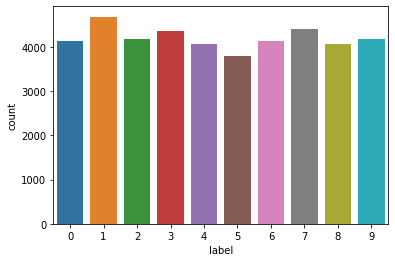

In [74]:
X, y = load_data()

In [75]:
X_train, y_train, X_test, y_test = split_data(X, y, train_size=0.08)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3360, 784)
(3360,)
(840, 784)
(840,)


In [76]:
num_category = 10 

y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

# Backprop 

In [77]:
back_prop_time_elapsed = 0
r_hill_time_elapsed = 0
SA_time_elapsed = 0
GA_time_elapsed = 0
args = test_args

In [78]:
start_time = time.time()
nn_model1 = mlrose.NeuralNetwork(**args['gradient_descent'])

nn_model1.fit(X_train, y_train)
time_elapsed = time.time() - start_time
y_train_pred = nn_model1.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = nn_model1.predict(X_test)
y_test_accuracy = accuracy_score(y_test, y_pred)
print(time_elapsed)
print(y_train_accuracy)
print(y_test_accuracy)
back_prop_time_elapsed = time_elapsed

0.6792159080505371
0.5684523809523809
0.5404761904761904


In [79]:
start_time = time.time()
nn_model1 = mlrose.NeuralNetwork(**args['random_hill_climb'])

nn_model1.fit(X_train, y_train)
time_elapsed = time.time() - start_time
y_train_pred = nn_model1.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = nn_model1.predict(X_test)
y_test_accuracy = accuracy_score(y_test, y_pred)
print(time_elapsed)
print(y_train_accuracy)
print(y_test_accuracy)
r_hill_time_elapsed = time_elapsed

0.3340737819671631
0.03869047619047619
0.0380952380952381


In [80]:
start_time = time.time()
nn_model1 = mlrose.NeuralNetwork(**args['simulated_annealing'])

nn_model1.fit(X_train, y_train)
time_elapsed = time.time() - start_time
y_train_pred = nn_model1.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = nn_model1.predict(X_test)
y_test_accuracy = accuracy_score(y_test, y_pred)
print(time_elapsed)
print(y_train_accuracy)
print(y_test_accuracy)
SA_time_elapsed = time_elapsed

0.5056469440460205
0.03869047619047619
0.0380952380952381


In [81]:
start_time = time.time()
nn_model1 = mlrose.NeuralNetwork(**args['genetic_alg'])

nn_model1.fit(X_train, y_train)
time_elapsed = time.time() - start_time
y_train_pred = nn_model1.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = nn_model1.predict(X_test)
y_test_accuracy = accuracy_score(y_test, y_pred)
print(time_elapsed)
print(y_train_accuracy)
print(y_test_accuracy)
GA_time_elapsed = time_elapsed

75.35595703125
0.21339285714285713
0.20238095238095238


# Learning Rate

In [39]:
learning_rates_standard = [0.1, 0.01, 0.001, 0.0001]
train_accs_lr = []
for learning_rate in learning_rates:
    print(learning_rate)
    model = mlrose.NeuralNetwork(hidden_nodes = [64], 
                                 activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1200,
                                 bias = True, 
                                 is_classifier = True, 
                                 learning_rate = learning_rate,
                                 early_stopping = True, 
                                 clip_max = 5, 
                                 max_attempts = 500,
                                 random_state = 3, 
                                 curve = True
                                )
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_pred)
    print(y_train_accuracy)
    print(y_test_accuracy)
    train_accs_lr.append(y_train_accuracy)



1.0
0.8761904761904762


In [ ]:
plt.plot(max_iter_range, times_per_iterations['Knapsack']['r_hill'], label="r_hill")
plt.xlabel ('Iterations')
plt.ylabel ('time(s)')
plt.legend()
plt.title ('Knapsack time/num iterations')
plt.show()

# Hidden Node

In [28]:
hidden_node_count = [2, 4, 8, 16, 32, 64]
train_accs_hn = []
for node_cnt in hidden_node_count:
    
    model = mlrose.NeuralNetwork(hidden_nodes = [node_cnt], 
                                 activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1200,
                                 bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.0001,
                                 early_stopping = True, 
                                 clip_max = 5, 
                                 max_attempts = 500,
                                 random_state = 3, 
                                 curve = True
                                )
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_pred)
    print(y_train_accuracy)
    print(y_test_accuracy)
    train_accs_hn.append(y_train_accuracy)


0.5803571428571429


# Randomized Hill Climbing

In [51]:
nn_r_hill = mlrose.NeuralNetwork(hidden_nodes = [64], 
                                 activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 1200,
                                 bias = True, 
                                 is_classifier = True,
                                 learning_rate = 0.0001, 
                                 early_stopping = True, 
                                 random_state = 3,
                                 restarts = 0
                                )


nn_r_hill.fit(X_train, y_train)
y_train_pred = nn_r_hill.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = nn_r_hill.predict(X_test)
y_test_accuracy = accuracy_score(y_test, y_pred)
print(y_train_accuracy)
print(y_test_accuracy)


0.07827380952380952
0.07023809523809524


In [56]:
restarts = [2, 4, 8, 16, 32, 64]
train_accs_hn = []
for restart in restarts:
    print(restart)
    model = mlrose.NeuralNetwork(hidden_nodes = [64], 
                                 activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 1200,
                                 bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.0001,
                                 early_stopping = True, 
                                 clip_max = 5, 
                                 max_attempts = 500,
                                 random_state = 3, 
                                 restarts = restart,
                                 curve = True
                                )
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_pred)
    print(y_train_accuracy)
    print(y_test_accuracy)
    train_accs_hn.append(y_train_accuracy)



[2, 4, 8, 16, 32, 64]
0.04107142857142857
0.03333333333333333
[2, 4, 8, 16, 32, 64]
0.04107142857142857
0.03333333333333333
[2, 4, 8, 16, 32, 64]
0.04107142857142857
0.03333333333333333
[2, 4, 8, 16, 32, 64]


KeyboardInterrupt: 

In [ ]:
nn_sa = mlrose.NeuralNetwork(hidden_nodes = [50], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing’', 
                                 max_iters = 10,
                                 bias = True, 
                                 is_classifier = True,
                                 learning_rate = 0.0001, 
                                 early_stopping = True, 
                                 random_state = 1
                                 restarts = 0
                                )


nn_model1.fit(X_train, y_train)
y_train_pred = nn_model1.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)

In [ ]:
lr_accs = {
    'gradient_descent': [],
    'random_hill_climb': [],
    'simulated_annealing': [],
    'genetic_alg': []
}
learning_rates = [0.1, 0.01, 0.001, 0.0001]
gd_lr_accs = test_arg('learning_rate', learning_rates, 'gradient_descent', args)
plot_single(learning_rates, gd_lr_accs, "learning_rate", "accuracy", "acc vs learning rate backprop")

rh_lr_accs = test_arg('learning_rate', learning_rates, 'random_hill_climb', args)
plot_single(learning_rates, rh_lr_accs, "learning_rate", "accuracy", "acc vs learning rate r_hill")

sa_lr_accs = test_arg('learning_rate', learning_rates, 'simulated_annealing', args)
plot_single(learning_rates, sa_lr_accs, "learning_rate", "accuracy", "acc vs learning rate SA")

ga_lr_accs = test_arg('learning_rate', learning_rates, 'genetic_alg', args)
plot_single(learning_rates, ga_lr_accs, "learning_rate", "accuracy", "acc vs learning rate GA")


No handles with labels found to put in legend.


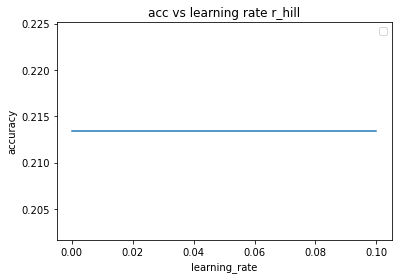

In [83]:
restarts = [2, 4, 8, 16, 32, 64]
rh_restart_accs = test_arg('restarts', restarts, 'random_hill_climb', args)
plot_single(learning_rates, gd_lr_accs, "num restarts", "accuracy", "acc vs restarts r_hill")


No handles with labels found to put in legend.


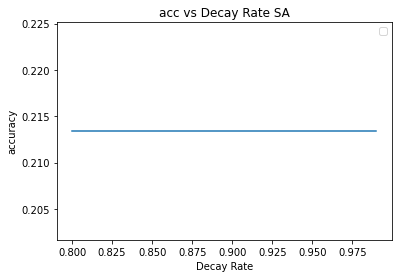

In [85]:
schedules = [
    mlrose.GeomDecay(init_temp=10, decay=0.8, min_temp=0.001), 
    mlrose.GeomDecay(init_temp=10, decay=0.9, min_temp=0.001),
    mlrose.GeomDecay(init_temp=10, decay=0.99, min_temp=0.001)
]
decays = [0.8, 0.9, 0.99]
sa_sched_accs = test_arg('schedule', schedules, 'simulated_annealing', args)
plot_single(decays, sa_sched_accs, "Decay Rate", "accuracy", "acc vs Decay Rate SA")

No handles with labels found to put in legend.


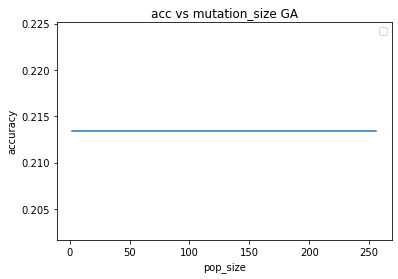

In [87]:
pop_size = [256, 512, 1024]
ga_pop_size_accs = test_arg('pop_size', pop_size, 'genetic_alg', args)
plot_single(pop_size, ga_pop_size_accs, "pop_size", "accuracy", "acc vs pop_size GA")

ValueError: x and y must have same first dimension, but have shapes (4,) and (8,)

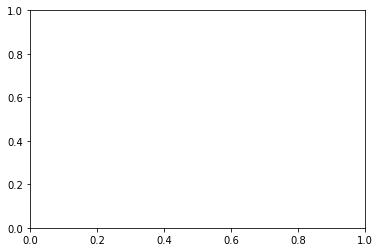

In [88]:
mutation_prob = [0.1, 0.3, 0.5, 0.7, 0.9]
ga_pop_size_accs = test_arg('pop_size', pop_size, 'genetic_alg', args)
plot_single(learning_rates, ga_pop_size_accs, "pop_size", "accuracy", "acc vs mutation_prob GA")